# Workflow:
## Newly measured data will have to be converted to h5 files using convert_to_h5( directory )
## Then you load all the files in that directory using load_files( directory ) 

In [1]:
# Import packages

# Ensure that this code works on both python 2 and python 3
from __future__ import division, print_function, absolute_import, unicode_literals

# basic numeric computation:
import numpy as np

# The package used for creating and manipulating HDF5 files:
import h5py

# Plotting and visualization:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mpltick

# for downloading files:
import wget
import os

# multivariate analysis:
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import subprocess
import sys

def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])
# Package for downloading online files:
# finally import pycroscopy:
import pyUSID as usid
import pycroscopy as px

from pycroscopy.viz import cluster_utils

In [2]:
import matplotlib.pyplot as plt
from vlabs.spm import *

diry = r"data"
load_files(diry)

#spm.load_files(diry)


([<HDF5 file "P0125OP0000.h5" (mode r)>,
  <HDF5 file "P0125OP0001.h5" (mode r)>,
  <HDF5 file "P0125OP0002.h5" (mode r)>,
  <HDF5 file "P0125OP0003.h5" (mode r)>,
  <HDF5 file "P0125OP0004.h5" (mode r)>,
  <HDF5 file "P0125OP0005.h5" (mode r)>,
  <HDF5 file "P0125OP0006.h5" (mode r)>,
  <HDF5 file "P0125OP0007.h5" (mode r)>,
  <HDF5 file "P0142OP0000.h5" (mode r)>,
  <HDF5 file "P0142OP0001.h5" (mode r)>],
 ['P0125OP0000.h5',
  'P0125OP0001.h5',
  'P0125OP0002.h5',
  'P0125OP0003.h5',
  'P0125OP0004.h5',
  'P0125OP0005.h5',
  'P0125OP0006.h5',
  'P0125OP0007.h5',
  'P0142OP0000.h5',
  'P0142OP0001.h5'])

##### Here we define the arrays for the data and the directory we are using

In [3]:
import os

scans = []
topo, ampl1, ampl2, phase1, phase2 = [], [], [], [], []
experiment = []

# Here you can paste the directory of the scans you want to look at
diry = r"data"



# Only execute the below cell if you want to convert IBW files to h5. This conversion only needs to be done once.

In [4]:

convert_to_h5( diry )

Completed


/opt/anaconda3/lib/python3.8/site-packages/sidpy/sid/translator.py:42: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  warn('Consider using sidpy.Reader instead of sidpy.Translator if '


In [5]:
%qtconsole

# Load files in directory here

In [8]:
expt, fnames = load_files(diry)
j=0
for name in fnames:
    print(name + ' - ' + str(j))
    j += 1

P0125OP0000.h5 - 0
P0125OP0001.h5 - 1
P0125OP0002.h5 - 2
P0125OP0003.h5 - 3
P0125OP0004.h5 - 4
P0125OP0005.h5 - 5
P0125OP0006.h5 - 6
P0125OP0007.h5 - 7
P0142OP0000.h5 - 8
P0142OP0001.h5 - 9


In [9]:
expt[-1].filename

topo1 = usid.USIDataset(expt[-1]['Measurement_000/Channel_000/Raw_Data'])

C:\Users\oliver\anaconda3\lib\site-packages\pyUSID\io\usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


# Use the numbers in previous cell output to pick which scan you want to look at
## The cell below loads the data from one scan into variables representing the topography, amplitude1, phase1, amplitude2, and phase2 channels

In [10]:
i = 3

[t1, a1, p1, a2, p2] = get_channels( expt[i], fmt='arr')


In [11]:
t1

array([[-2.7631586e-10,  1.7863044e-10,  5.8170713e-10, ...,
         2.4711824e-09,  1.4054251e-09,  1.3488943e-10],
       [-1.4853185e-10,  3.0243541e-10,  7.0852479e-10, ...,
         2.3484859e-09,  1.3044428e-09,  1.3613999e-11],
       [ 2.0179414e-11,  4.6961190e-10,  8.9747232e-10, ...,
         2.2165807e-09,  1.1875727e-09, -9.7315933e-11],
       ...,
       [-1.4588011e-09, -1.8380604e-09, -2.2131417e-09, ...,
        -1.5521096e-09, -1.8480364e-09, -1.8758328e-09],
       [-1.5426451e-09, -1.9215634e-09, -2.3114239e-09, ...,
        -1.5534738e-09, -1.8368098e-09, -1.8762591e-09],
       [-1.6040929e-09, -1.9886386e-09, -2.3692905e-09, ...,
        -1.5878641e-09, -1.8585808e-09, -1.9281856e-09]], dtype=float32)

# Plotting
### The below cell plots the topography, amplitude and phase of the scan. 
#### You can pick which amplitude or phase channel you use by changing a1 to a2 and vice versa when defining the "channel1" variable
#### You can adjust the topography, amplitude and phase ranges by changing the numbers in the z_range, a_range, and p_range variables

Text(0.8, 0.9, 'P0125OP0003')

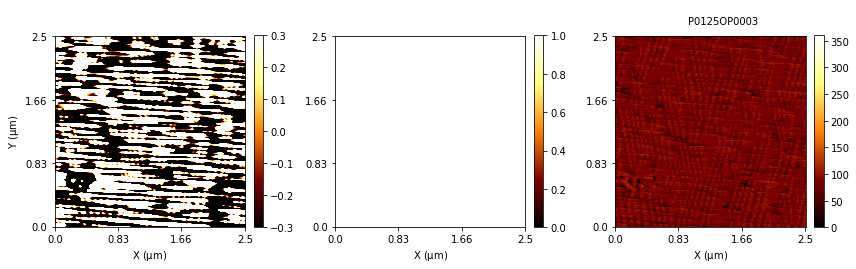

In [12]:


channel1 = [np.array(t1).T, np.array(a2).T, np.array(p2).T]
z_range = (-0.3,0.3)
a_range = (0, 1)
p_range = (0, 360)
ranges = [z_range, a_range, p_range]
fig, ax = plt.subplots( figsize=(12,4) )

gs = gridspec.GridSpec(1,3)
ax.axis('off')

fig, ax = multi_image_plot( channel1, expt[i], fig=fig, axis=ax, gs=gs, zrange=ranges, ntick=5, cmap='afmhot' )

'''
Uncomment the below line to save the figure to a .SVG file. You can also change the filetype it saves 
by just changing the '.svg' section to '.png' or whatever your preference is. 
'''
#plt.savefig(diry + fnames[i][:-3] + '.svg', transparent=True)

fig.text(0.8, 0.9, fnames[i][:-3])


## Histograms

### Below are histogram plots of the topography, amplitude and phase 

Text(0.5, 0, 'Degrees')

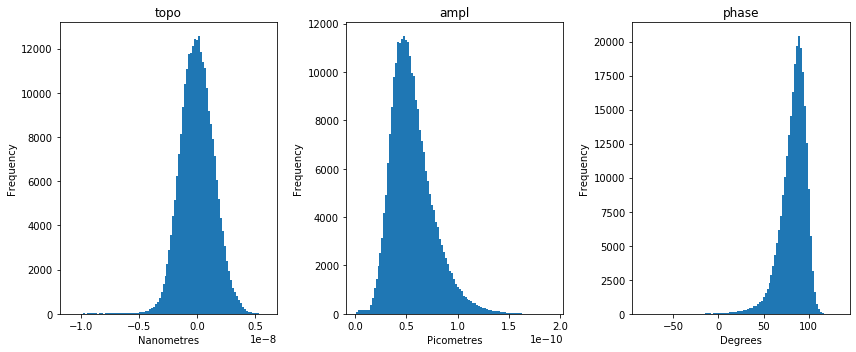

In [13]:
#Data for plots
topo = np.array(t1)
t1D = topo.flatten()

ampl = np.array(a1)
a1D = ampl.flatten()
ampl2 = np.array(a2)
a1D2 = ampl2.flatten()

phase = np.array(p1)
p1D = phase.flatten()
phase2 = np.array(p2)
p1D2 = phase2.flatten()


#histogram plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].hist(t1D, bins = 100)
axs[0].set_title('topo')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Nanometres')

axs[1].hist(a1D2, bins = 100)
axs[1].set_title('ampl')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Picometres')

axs[2].hist(p1D2, bins = 100)
axs[2].set_title('phase')
axs[2].set_ylabel('Frequency')
axs[2].set_xlabel('Degrees')

#axs[0].set_yscale('log')

## Curve fitting

### Curve fitting of above histograms with guassian, skewed gaussian distribution

#### You can change which histogram data is used and the specific curve fitting function (t1D, a1D, a1D2, p1D, p1D2) 

In [75]:
#import packages 
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import skew
import math
import scipy.special as sp

#select what histogram data you want to fit 
hist_data = p2D2

"""defining functions"""

# Guassian distribtion
# x = integer, amp = height of curve peak, mu = centre of peak, std = width, bg = background
def gaussian(x, amp, mu, std, bg):
    mu, std = norm.fit(hist_data) 
    return amp*np.exp(-np.power(x - mu, 2)/(2 * np.power(std, 2))) + bg

#skewed gaussian distribution
#alpha = skewness factor
def skewed_gauss(x, amp, mu, std, alpha):
    #normpdf = np.exp(-np.power(x - mu, 2)/(2 * np.power(std, 2)))
    normpdf = (1/(std*np.sqrt(2*math.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(std,2))))
    normcdf = (0.5*(1+sp.erf((alpha*((x - mu)/std))/(np.sqrt(2)))))
    alpha = skew(hist_data)
    return 2*amp*normpdf*normcdf

#Rayleigh distribution 
def rayleigh(x, amp, sigma, bg):
    return amp*x*np.exp((-x**2/(2*sigma**2)))*(1/sigma**2) + bg

#exponential decay
def exp(x, A, beta):
    return A * np.exp(-x/beta) 

# Lorentz distribution 
# x = integer, amp = height of curve peak, width = width half PDF, xc = location parameter, bg = background                     
def lorentz(x, amp, width, xc, bg):
    return amp*(1/np.pi) * (0.5 * width)/((x - xc)**2 + (0.5*width)**2)

"""Curve fitting"""

#Height of histogram bins and bin edge values
counts, bin_edges = np.histogram(hist_data, bins=100)

#X data for curve fit is the bin centres, which is calculated from edges
bincentres = np.array([0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)])
x_data = bincentres

# Fit function to histogram data, can also change which function, use p0 to enter parameter values
centre = x_data[np.argmax(counts)]
amp = max(counts)
popt, pcov = curve_fit(skewed_gauss, x_data, counts, p0=[amp, centre, centre, 1])

# Plot the histogram 
plt.hist(hist_data, bins = 100, color ='navy', label = 'Histogram')

# Plot the fitted function, you can change which function here 
plt.plot(x_data, skewed_gauss(x_data, *popt), color ='darkorange', linewidth=2.5, label = 'Fitted function')
plt.legend(loc = 'upper left')
plt.ylabel('Frequency')
plt.xlabel('Degrees')

# Change entries to alter title depending on function and data type
plt.title("{} distribution of {} data".format('Gaussian', "topography"))

#comment below 2 lines if not graphing topography 
#Display std of topography on graph as roughness
#roughness = np.std(t1D)
#plt.text(-1e-8, 8000, "the roughness is {:.3e}".format(roughness))



NameError: name 'p2D2' is not defined

4.782891444010673e-11
11477


Text(0.5, 1.0, 'Gaussian distribution of topography data')

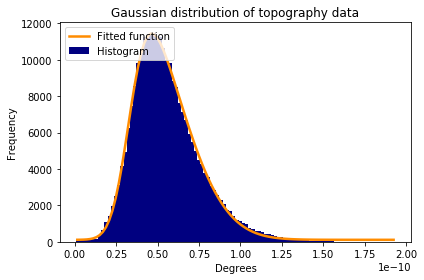

In [60]:
#Height of histogram bins and bin edge values
counts, bin_edges = np.histogram(hist_data, bins=100)

#X data for curve fit is the bin centres, which is calculated from edges
bincentres = np.array([0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)])
x_data = bincentres


centre = x_data[np.argmax(counts)]
amp = max(counts)

# Fit function to histogram data, can also change which function, use p0 to enter parameter values
popt, pcov = curve_fit(skewed_gauss, x_data, counts, p0=[amp, centre, centre, 1, 0])

# Plot the histogram 
plt.hist(hist_data, bins = 100, color ='navy', label = 'Histogram')





# Plot the fitted function, you can change which function here 
plt.plot(x_data, skewed_gauss(x_data, *popt), color ='darkorange', linewidth=2.5, label = 'Fitted function')
plt.legend(loc = 'upper left')
plt.ylabel('Frequency')
plt.xlabel('Degrees')

# Change entries to alter title depending on function and data type
plt.title("{} distribution of {} data".format('Gaussian', "topography"))


In [55]:
print(popt)

[ 2.00869504e-08 -3.29673047e-09 -4.74939967e-09  7.77617994e+01
  2.62144000e+03]


# Fourier transforms

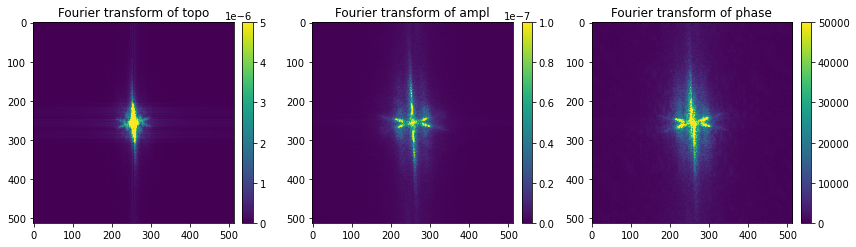

In [60]:
topo_fft = np.fft.fftshift(np.fft.fft2(t1))
ampl_fft = np.fft.fftshift(np.fft.fft2(a2))
phase_fft = np.fft.fftshift(np.fft.fft2(p2))

fig, axes = plt.subplots(1,3, figsize = (12,5))
im1 = axes[0].imshow(abs(topo_fft.T), vmin = 0, vmax = 5e-6)
axes[0].set_title('Fourier transform of topo')
cbar1 = fig.colorbar(im1, ax = axes[0], fraction=0.046, pad=0.04)

im2 = axes[1].imshow(abs(ampl_fft.T), vmin=0, vmax = 1e-7)
axes[1].set_title('Fourier transform of ampl')
cbar2 = fig.colorbar(im2, ax = axes[1], fraction=0.046, pad=0.04)

im3 = axes[2].imshow(abs(phase_fft.T), vmin = 0, vmax = 5e4)
axes[2].set_title('Fourier transform of phase')
cbar3 = fig.colorbar(im3, ax = axes[2], fraction=0.046, pad=0.04)

# Roughness calculations

(array([44597., 46184., 24038., 15408., 11384.,  8978.,  7568.,  6146.,
         4882.,  4098.,  3552.,  3456.,  2946.,  2534.,  2206.,  2144.,
         2148.,  1872.,  1952.,  1830.,  1844.,  1802.,  1726.,  1600.,
         1612.,  1662.,  1386.,  1310.,  1328.,  1198.,  1046.,   980.,
         1048.,  1034.,  1084.,  1238.,  1142.,  1067.,  1048.,  1024.,
          914.,   864.,   804.,   748.,   724.,   750.,   758.,   590.,
          586.,   522.,   510.,   536.,   510.,   506.,   556.,   554.,
          530.,   486.,   442.,   494.,   430.,   336.,   410.,   372.,
          362.,   350.,   384.,   344.,   396.,   386.,   344.,   314.,
          272.,   276.,   280.,   304.,   242.,   248.,   226.,   222.,
          220.,   256.,   284.,   258.,   236.,   224.,   206.,   184.,
          186.,   224.,   184.,   160.,   174.,   160.,   138.,   152.,
          170.,   164.,   122.,   132.]),
 array([0.00e+00, 2.00e-09, 4.00e-09, 6.00e-09, 8.00e-09, 1.00e-08,
        1.20e-08, 1.40e-08

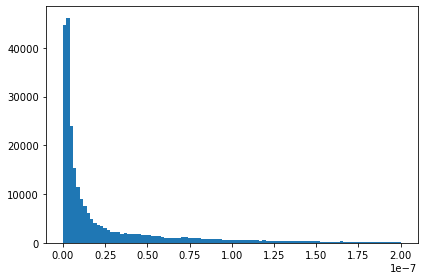

In [44]:
fig, axs = plt.subplots()
axs.hist(abs(topo_fft).flatten(), bins = 100, range = (0, 2e-7))

In [14]:
avgT = np.average(t1)
roughness = np.std(t1)
print(roughness)

1.4617609e-09


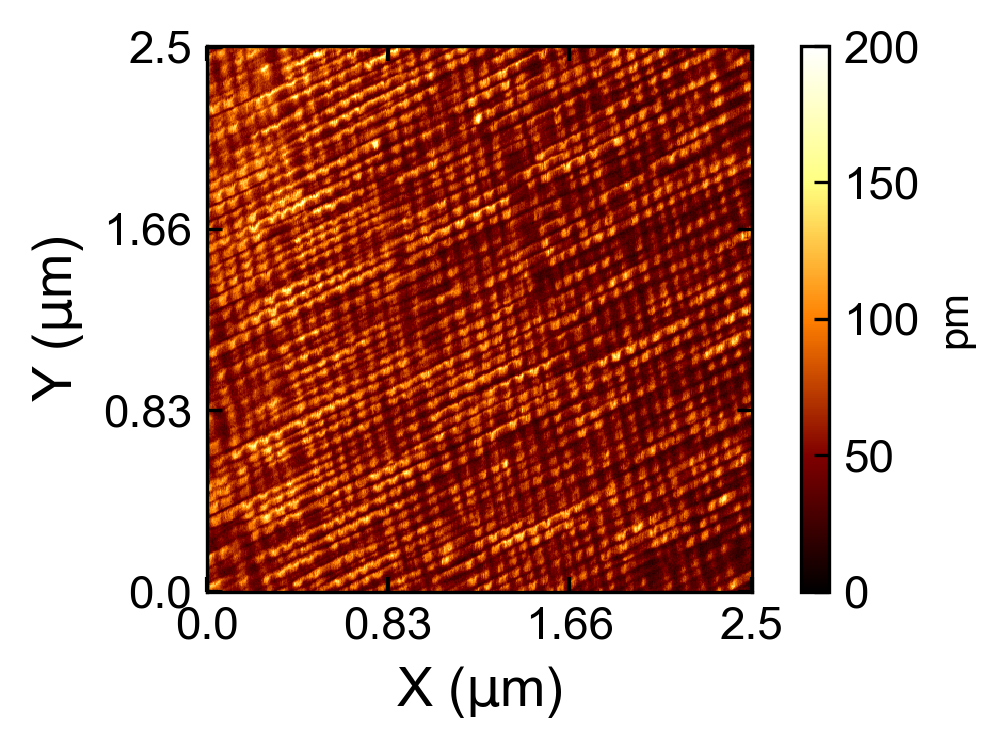

In [73]:
xvec = np.linspace( 0, 
                   usid.hdf_utils.get_attributes(expt[i]['Measurement_000'])['ScanSize']/10**(-6),
                   len(t1))
fig, ax = single_image_plot( a1/10**(-12), fnames[i], xvec, zrange=(0,200), cbar_label='pm')
fig.tight_layout()
plt.savefig(diry + fnames[i][:-3] + '_ampl.svg', transparent=True)

In [179]:
print('Datasets and datagroups within the file:\n------------------------------------')
usid.hdf_utils.print_tree(expt[10])

Datasets and datagroups within the file:
------------------------------------
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data
  ├ Channel_001
    -----------
    ├ Raw_Data
  ├ Channel_002
    -----------
    ├ Raw_Data
  ├ Channel_003
    -----------
    ├ Raw_Data
  ├ Channel_004
    -----------
    ├ Raw_Data
  ├ Channel_005
    -----------
    ├ Raw_Data
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
